In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import time

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# file to analyze
file_name = "mock_cor_matrix.csv"

# read the dataframe from the csv file
corr_df = pd.read_csv(file_name, index_col=0)

In [ ]:
def simulate_column(corr_mat :pd.core.frame.DataFrame, target_of_sim :str, initial_input_nudge :float, n_iterations :int, scale_type :str):
    cols = list(range(n_iterations + 1))

    # create a dataframe of zeros with the specified column labels and index from corr_mat's columns
    delta_sim_results = pd.DataFrame(0, index=corr_mat.columns, columns=cols, dtype='float64')

    # fill in the initial nudge
    delta_sim_results.loc[target_of_sim, 0] = initial_input_nudge

    for i in range(1, n_iterations + 1):
        # calculate the next iteration
        non_scales_iter_res = corr_mat.multiply(delta_sim_results.loc[:,i-1], axis = 0).sum(axis = 0)
        
        if scale_type == "non-linear":
            # save vars for performance
            max_val = non_scales_iter_res.max()
            min_val = non_scales_iter_res.min()
            
            if max_val > 1 or min_val < -1:
                # update iteration column with scales version of computation for numerical stability
                delta_sim_results.loc[:, i] = 2*(non_scales_iter_res - min_val)/(max_val - min_val) - 1
            else:
                delta_sim_results.loc[:, i] = non_scales_iter_res
        
        elif scale_type == "sqrt":
            negValues = non_scales_iter_res < 0
            posValues = non_scales_iter_res >=0

            non_scales_iter_res[negValues] = np.sqrt(np.abs(non_scales_iter_res[negValues])) * -1
            non_scales_iter_res[posValues] = np.sqrt(np.abs(non_scales_iter_res[posValues]))

            delta_sim_results.loc[:, i] = non_scales_iter_res
        
        elif scale_type == "log":
            negValues = non_scales_iter_res < 0
            posValues = non_scales_iter_res >=0
            
            non_scales_iter_res[negValues] = np.negative(np.log(np.abs(non_scales_iter_res[negValues]) + 1))
            non_scales_iter_res[posValues] = np.log(np.abs(non_scales_iter_res[posValues]) + 1)

            delta_sim_results.loc[:, i] = non_scales_iter_res

        else:
            # update iteration column with non scaled calulated array
            delta_sim_results.loc[:, i] = non_scales_iter_res

        #break
    return delta_sim_results

In [ ]:

column_to_sim = 'm'
initial_nudge = .1
iterations = 100

start = time.time()
results_unadjusted = simulate_column(corr_df, column_to_sim, initial_nudge, iterations, "_").T
end = time.time()

results_log = simulate_column(corr_df, column_to_sim, initial_nudge, iterations, "log").T
results_sqrt = simulate_column(corr_df, column_to_sim, initial_nudge, iterations, "sqrt").T

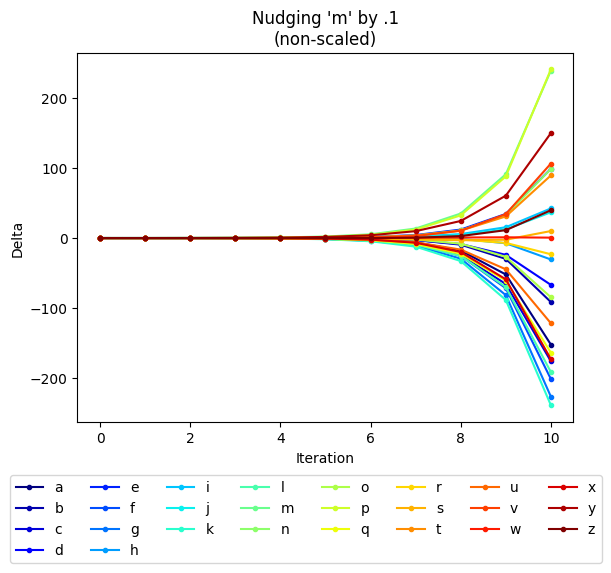

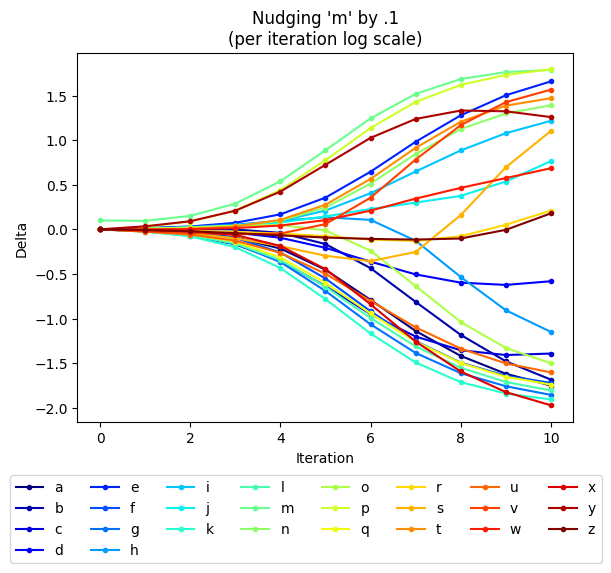

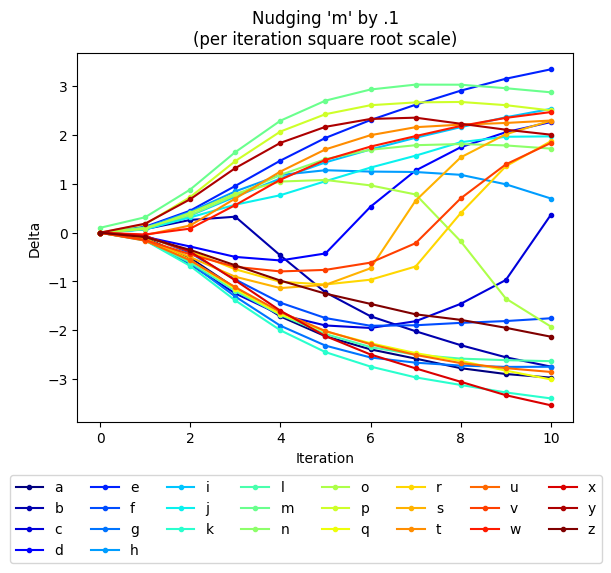

In [ ]:
colors = pl.cm.jet(np.linspace(0,1,26))

ax = results_unadjusted.plot(style='.-', color=colors)
ax.set_title("Nudging '" + column_to_sim + "' by .1\n(non-scaled)")
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.legend(loc = "lower left", ncol = 8, bbox_to_anchor = (-.15,-.4))
plt.show()

ax = results_log.plot(style='.-', color=colors)
ax.set_title("Nudging '" + column_to_sim + "' by .1\n(per iteration log scale)")
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.legend(loc = "lower left", ncol = 8, bbox_to_anchor = (-.15,-.4))
plt.show()


ax = results_sqrt.plot(style='.-', color=colors)
ax.set_title("Nudging '" + column_to_sim + "' by .1\n(per iteration square root scale)")
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.legend(loc = "lower left", ncol = 8, bbox_to_anchor = (-.15,-.4))
plt.show()

In [ ]:
(end - start) * 790244

7903.7513256073